In [1]:
import sys
sys.path.append("../")
sys.path.append('C:\Users\James Pino\PycharmProjects\Magine')
from IPython.display import display
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import magine.ontology.enrichment_tools as et
from magine.plotting.heatmaps import  heatmap_from_array, convert_to_log
from magine.plotting.wordcloud_tools import create_wordcloud

In [3]:
process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]
enrichment_array = pd.read_csv('Data/cisplatin_enrichment.csv.gz', index_col=0)


In [25]:

specific_array = et.filter_dataframe(enrichment_array, p_value=0.05, combined_score=0.0,
                                     db='Reactome_2016',  category=['proteomics_up'])

drug_dbs = ['DrugMatrix', 'Drug_Perturbations_from_GEO_2014']

rna_drug_df = et.filter_dataframe(enrichment_array, p_value=0.05, combined_score=0.0, db=drug_dbs)

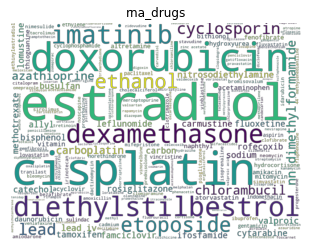

In [6]:
counts = create_wordcloud(rna_drug_df, 'rna_drugs')

In [26]:
slimmed_array = et.remove_redundant(specific_array, threshold=0.7, verbose=False)

Number of rows went from 574 to 53


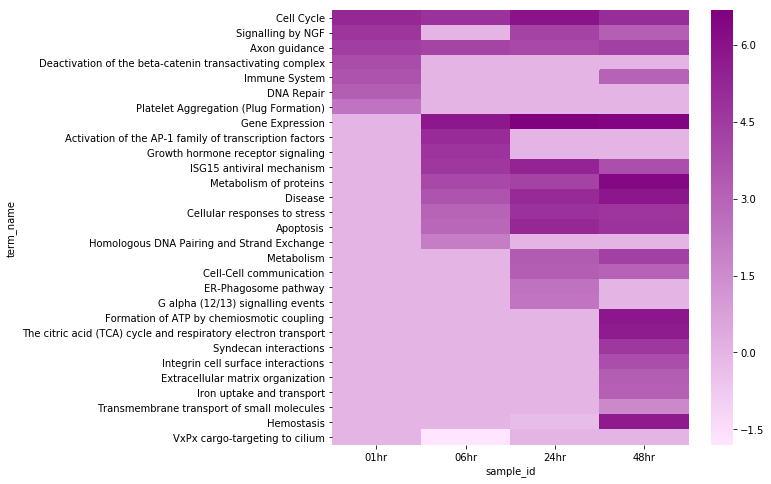

In [27]:
fig = heatmap_from_array(slimmed_array, convert_to_log=True, fig_size=(8, 8))
fig.savefig('enrichment.png', dpi=300, bbox_inches='tight')

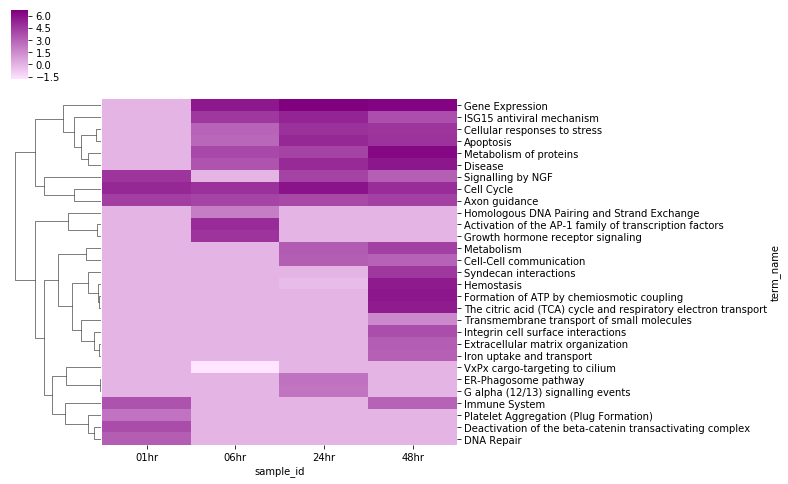

In [28]:
fig = heatmap_from_array(slimmed_array, convert_to_log=True, cluster_col=False, cluster_row=True, fig_size=(8, 8))
fig.savefig('cluster_enrichment.png', dpi=300, bbox_inches='tight')

Now lets explore the experimental data


In [11]:
d = pd.read_csv('Data/norris_et_al_2017_cisplatin_exp_data.csv.gz', low_memory=False)

In [12]:
met = d[d['data_type'].isin(['HILIC', 'C18'])]
proteins = d[d['data_type'].isin(['label_free', 'silac', 'ph_silac'])]
rna_seq = d[d['data_type'] == 'rna_seq']

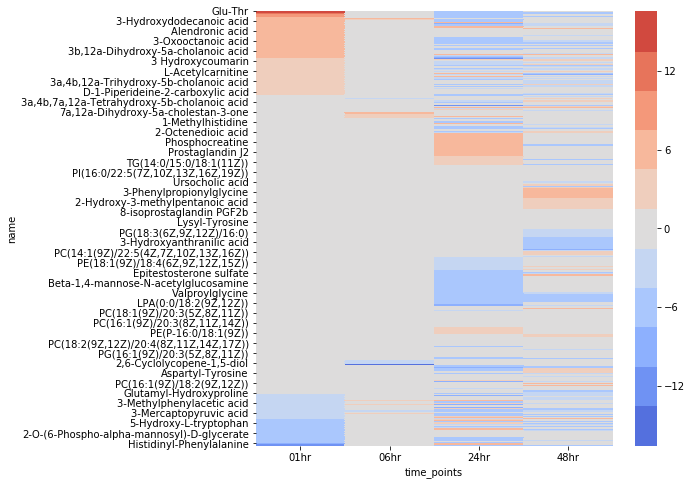

In [13]:
fig = heatmap_from_array(met, cluster_row=False, convert_to_log=True, 
                         index='name', values='treated_control_fold_change', 
                         columns='time_points', div_colors=True, fig_size=(8, 8), num_colors=11)

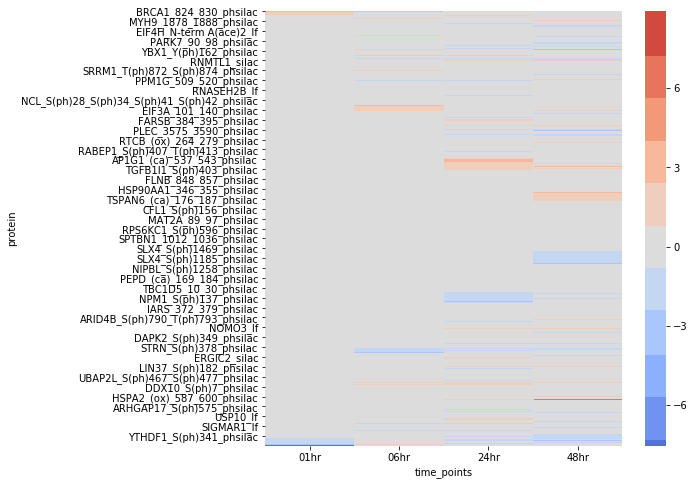

In [17]:
fig = heatmap_from_array(proteins, cluster_row=False, convert_to_log=True, 
                         index='protein', values='treated_control_fold_change', 
                         columns='time_points', div_colors=True, fig_size=(8, 8),  num_colors=11)

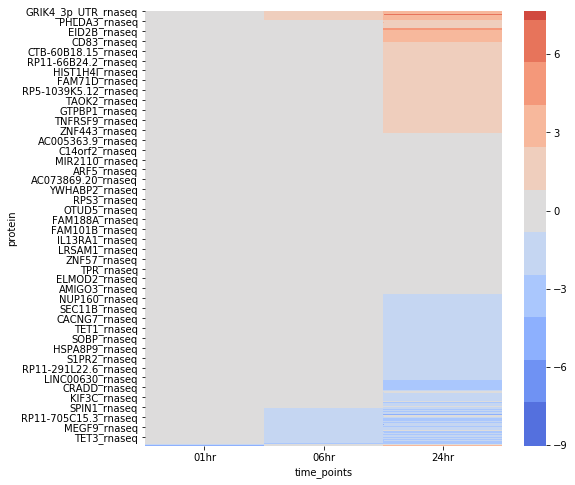

In [19]:
sig_rna = rna_seq[rna_seq['significant_flag']]
fig = heatmap_from_array(sig_rna, cluster_row=False, convert_to_log=True, 
                         index='protein', values='treated_control_fold_change', 
                         columns='time_points', div_colors=True, fig_size=(8, 8), num_colors=11)